In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



data = pd.read_csv("train.csv")
test_data =pd.read_csv("test.csv")

In [4]:
#train_data.describe(include = 'all')

In [5]:
train_data=data.drop(labels=["PassengerId","Cabin","Ticket","Name"],axis=1)
train_data=train_data.dropna(axis=0) #remove rows with missing data. This removes approx 180 datapoints!
train_data.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712,712.000000,712.000000,712.000000,712.000000,712
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,554
mean,0.404494,2.240169,NaN,29.642093,0.514045,0.432584,34.567251,NaN
std,0.491139,0.836854,NaN,14.492933,0.930692,0.854181,52.938648,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,1.000000,NaN,20.000000,0.000000,0.000000,8.050000,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.645850,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.000000,NaN


In [6]:
all_y=train_data["Survived"].values
train_data=train_data.drop(labels=["Survived"],axis=1)

In [7]:
train_data=pd.get_dummies(train_data, columns=["Pclass","Sex","Embarked","SibSp","Parch"])
train_data.head(5)

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,SibSp_3,SibSp_4,SibSp_5,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,22.0,7.2500,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,38.0,71.2833,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,7.9250,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,35.0,53.1000,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [8]:
train_data['Age']=train_data["Age"]/train_data["Age"].max()
train_data['Fare']=train_data["Fare"]/train_data["Fare"].max()
pd.set_option('display.max_columns', 500)
train_data.describe()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.370526,0.067471,0.258427,0.242978,0.498596,0.363764,0.636236,0.182584,0.039326,0.778090,0.658708,0.257022,0.035112,0.016854,0.025281,0.007022,0.728933,0.154494,0.095506,0.007022,0.005618,0.007022,0.001404
std,0.181162,0.103329,0.438078,0.429183,0.500350,0.481420,0.481420,0.386597,0.194506,0.415823,0.474477,0.437299,0.184193,0.128815,0.157087,0.083564,0.444823,0.361676,0.294119,0.083564,0.074795,0.083564,0.037477
min,0.005250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.015713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.350000,0.030539,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.475000,0.064412,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
num_train=int(len(train_data)*0.75)
y_val=all_y[num_train:]
x_val=train_data[num_train:]

x_train=train_data[0:num_train]
y_train=all_y[0:num_train]
print(y_train.shape)
print(len(y_val))
print(x_train.shape)
print(x_val.shape)
print(y_train)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)


(534,)
178
(534, 23)
(178, 23)
[0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0
 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1
 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 

C:\Users\Rudolfs\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (534, 23)
534 train samples
178 test samples
Train on 534 samples, validate on 178 samples
Epoch 1/40
534/534 [==============================] - 1s 1ms/step - loss: 0.6725 - acc: 0.6292 - val_loss: 0.6138 - val_acc: 0.7753
Epoch 2/40
534/534 [==============================] - 0s 34us/step - loss: 0.6010 - acc: 0.7809 - val_loss: 0.5417 - val_acc: 0.7809
Epoch 3/40
534/534 [==============================] - 0s 41us/step - loss: 0.5440 - acc: 0.7865 - val_loss: 0.4832 - val_acc: 0.7809
Epoch 4/40
534/534 [==============================] - 0s 49us/step - loss: 0.4980 - acc: 0.7828 - val_loss: 0.4527 - val_acc: 0.8034
Epoch 5/40
534/534 [==============================] - 0s 34us/step - loss: 0.4796 - acc: 0.7921 - val_loss: 0.4479 - val_acc: 0.7978
Epoch 6/40
534/534 [==============================] - 0s 36us/step - loss: 0.4622 - acc: 0.7940 - val_loss: 0.4307 - val_acc: 0.7921
Epoch 7/40
534/534 [==============================] - 0s 37us/step - loss: 0.4558 - acc: 0.7940 -

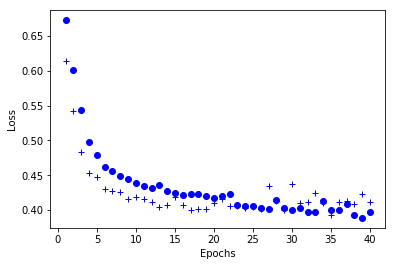

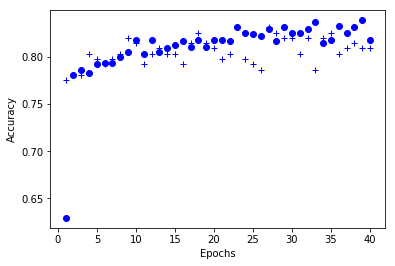

In [10]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

batch_size = 100
num_classes = 2
epochs = 40

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'test samples')

input_shape=(x_train.shape[1])

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=input_shape))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

###
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [11]:
IDs=test_data["PassengerId"].values
def modifytest(df):
    test_data_2=df.drop(labels=["PassengerId","Cabin","Ticket","Name"],axis=1)
    test_data_2["Age"]=test_data_2["Age"].fillna(test_data_2["Age"].mean())
    test_data_2["Fare"]=test_data_2["Fare"].fillna(test_data_2["Fare"].mean())
    test_data_2=pd.get_dummies(test_data_2, columns=["Pclass","Sex","Embarked","SibSp","Parch"])
    test_data_2=test_data_2.drop(labels=["Parch_9","SibSp_8"],axis=1)

    test_data_2['Age']=test_data_2["Age"]/test_data_2["Age"].max()
    test_data_2['Fare']=test_data_2["Fare"]/test_data_2["Fare"].max()
    
    return test_data_2
x_test=modifytest(test_data)
x_test.describe()

print(x_train.shape)
print(x_test.shape)

x_train.head(5)

(534, 23)
(418, 23)


,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0.2750,0.014151,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0.4750,0.139136,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0.3250,0.015469,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0.4375,0.103644,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0.4375,0.015713,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [12]:
x_test.head(5)

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0.453947,0.015282,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0.618421,0.013663,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0.815789,0.018909,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0.355263,0.016908,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0.289474,0.023984,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [13]:

y_predict=model.predict_classes(x_test)
output=pd.DataFrame(y_predict)
output.index=IDs
output.to_csv("NNpredict.csv",index_label="PassengerId",header=["Survived"] )

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfmodel = RandomForestClassifier(n_estimators=100)
rfmodel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
from sklearn import metrics
ypred=rfmodel.predict(x_val)
print(metrics.classification_report(ypred, y_val))

             precision    recall  f1-score   support

          0       0.77      0.81      0.79       102
          1       0.73      0.68      0.70        75

avg / total       0.75      0.76      0.75       177

